<a href="https://colab.research.google.com/github/ImmanuelNK/Exercise-DATAMINING/blob/main/%5BQuestion%5D_Exercise_Week_8_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [2]:
# load dataset and show the first five sample
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df.rename(columns={'Annual Income (k$)': 'AnnualIncome','Spending Score (1-100)': 'SpendingScore'}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


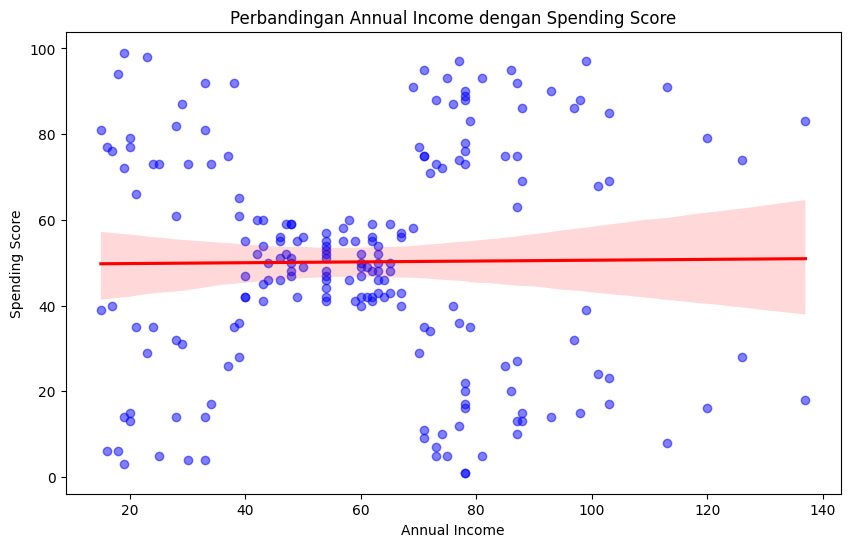

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x='AnnualIncome', y='SpendingScore', data=df, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})

# Menambahkan judul dan label
plt.title('Perbandingan Annual Income dengan Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# Menampilkan chart
plt.show()

#Disini kita bisa melihat distribusi perbandingan antara AnnualIncome dengan Spending Score dari scatter plot

## Data Preprocessing

For this case study, we only use income and spending score

In [7]:
# create new dataframe that consist only annual income and spending score
df_gabunganincomescore = df[["AnnualIncome", "SpendingScore"]]
df_gabunganincomescore.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [8]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_gabunganincomescore = pd.DataFrame(sc.fit_transform(df_gabunganincomescore), columns=["AnnualIncome","SpendingScore"])

df_gabunganincomescore.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [9]:
# get stastical information on the new dataset
df_gabunganincomescore.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

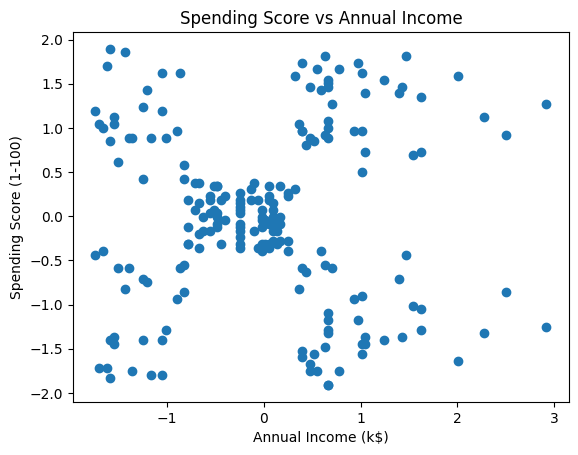

In [10]:
# Visualize the position
plt.scatter(df_gabunganincomescore['AnnualIncome'], df_gabunganincomescore['SpendingScore'])
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

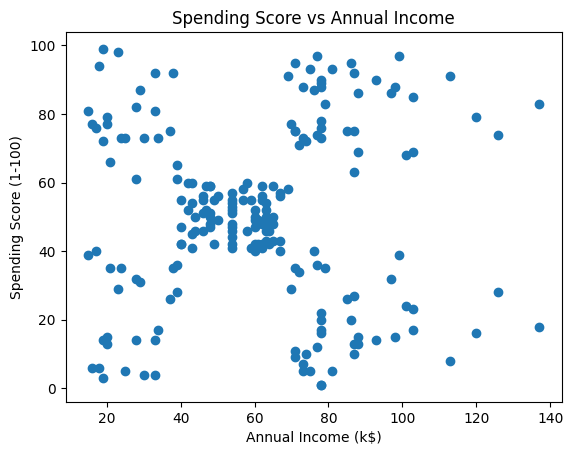

In [11]:
# Visualize the position using the original scale
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [12]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
# Menyimpan nilai sse untuk setiap jumlah kluster
sse = []
# Loop untuk menghitung sse untuk setiap jumlah kluster dari 1 hingga 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_gabunganincomescore)  # Asumsi bahwa df_gabunganincomescore adalah DataFrame yang telah distandarkan
    sse.append(kmeans.inertia_)

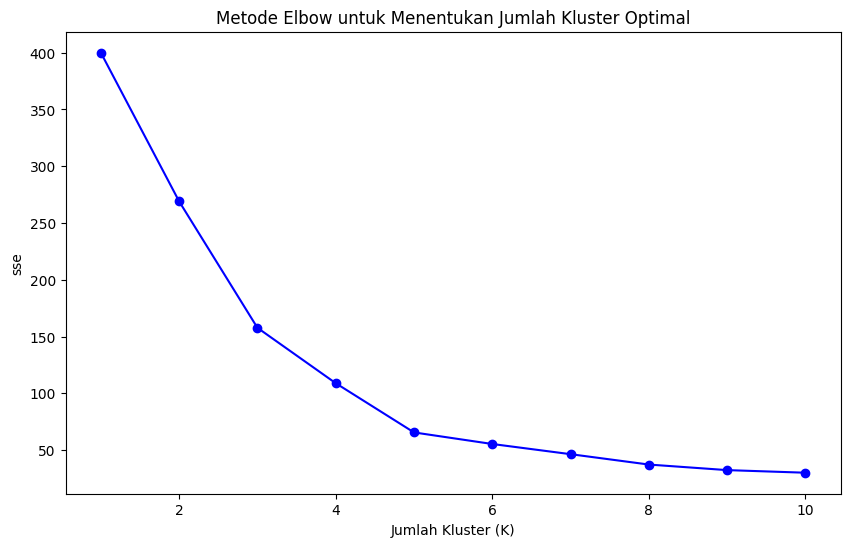

In [13]:
# manually visualize the elbow method using plotlib
# Membuat plot Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('sse')
plt.show()

In [14]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best K for your model is : ", kneedle.elbow)

The best K for your model is :  5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [15]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = Kmeans.fit_predict(df_gabunganincomescore)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

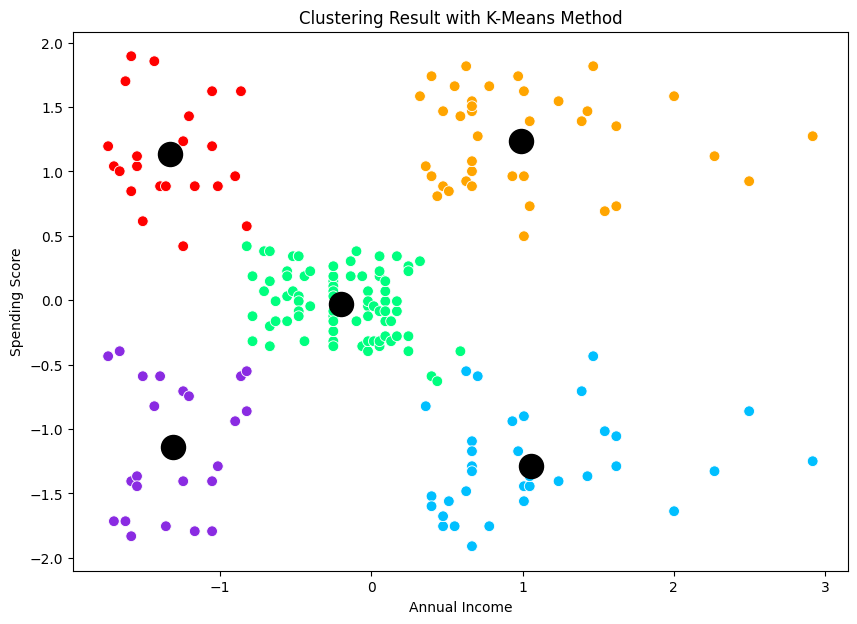

In [16]:
# visualize the result using scater chart
plt.figure(figsize=(10, 7))

# Membuat scatter plot untuk data berdasarkan pendapatan (income) dan pengeluaran (spending)
sns.scatterplot(x="AnnualIncome", y="SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"], legend=None, data=df_gabunganincomescore, s=60)

# Memvisualisasikan centroid dari masing-masing cluster
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=300, c="black")

# Memberi label dan judul pada plot
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clustering Result with K-Means Method")

# Menampilkan plot
plt.show()


In [17]:
# Inverse transform the scaled data to get the original values
df_gabunganincomescore = pd.DataFrame(sc.inverse_transform(df_gabunganincomescore), columns=["AnnualIncome", "SpendingScore"])
df_gabunganincomescore['Cluster'] = y_pred
df_gabunganincomescore.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [19]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_gabunganincomescore.groupby(y_pred).agg({"SpendingScore": ["mean", "std", "min", "max"],
                                                              "AnnualIncome": ["mean", "std", "min", "max"]})
cluster_summary = cluster_summary.rename_axis('cluster')
cluster_summary

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

In [ ]:
#Cluster 0 :
#Conclusion = Cluster 0 terdiri dari individu yang memiliki pendapatan tahunan dan pengeluaran terendah.
#Implication = Strategi nya ialah dengan mendistribusikan barang-barang yang lebih terjangkau

#Cluster 1 :
#Conclusion = Cluster 1 terdiri dari individu yang memiliki pendapatan tahunan tinggi dan pengeluaran tinggi.
#Implication = Strategi nya ialah dengan memberikan promosi atau layanan premium yang memliki kemungkinan cluster ini tertarik. Menggunakan kredit atau tabungan.Target mereka dengan produk bernilai tinggi, penawaran eksklusif, dan program loyalitas.

#Cluster 2 :
#Conclusion = Cluster 2 terdiri dari individu yang memiliki pengeluaran rendah dan pendapatan tahunan tinggi.
#Implication = Fokus pada peluang investasi, rencana tabungan, dan barang-barang berkualitas tinggi yang tahan lama untuk klaster ini.
              #Soroti nilai dan manfaat jangka panjang dari produk.

#Cluster 3 :
#Conclusion = Cluster 0 terdiri dari individu yang memiliki pendapatan tahunan dan pengeluaran tinggi.
#Implication = Strategi nya ialah dengan menawarkan barang mewah, layanan eksklusif, dan pengalaman yang dipersonalisasi.
              #Tekankan kualitas, status, dan eksklusivitas dalam kampanye pemasaran.

#Cluster 4 :
#Conclusion = Cluster 0 terdiri dari individu yang memiliki pendapatan tahunan dan pengeluaran sedang.
#Implication = Strategi nya ialah dengan memberikan penawaran yang seimbang yang memberikan kualitas bagus dengan harga yang wajar.
              #Fokus pada proposisi nilai uang dan barang mewah kelas menengah.

#CONCLUSION n IMPLICATION dapat membantu sebuah perusahaan untuk merancang strategi pemasaran yang ditargetkan untuk setiap cluster guna memaksimalkan keterlibatan dan penjualan

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>